In [1]:
import pandas as pd
import numpy as np
import calculate_cleavage_rate as clv
%matplotlib inline 
import matplotlib.pylab as plt
import seaborn as sns
sns.set_style('ticks')
current_colors = sns.color_palette()
reload(clv)
import sys
import create_fake_data as cr
reload(cr)
sys.path.append('../code_general_Finkelsteinlab')
import plotting_Finkelsteinlab as pltData
reload(pltData);

model_ID = 'Clv_init_limit_Saturated_general_energies_v2'
times = [0.0,12.0,60.0,180.0,600.0,1800.0,6000.0,18000.0,60000.0]
guide = 20

path_data = '../data_nucleaseq_Finkelsteinlab/targetE/'
filename_data = 'ECas9_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'

### Show result of fit

In [50]:
filename = 'fit_5_3_2019_sim_2.txt'
path = '5_3_2019/'
data = pd.read_table(path+filename,index_col=False)
final_par = data.loc[len(data)-1,'Parameter 1':'Parameter 43']
final_par_np = final_par.values
chi = data.loc[:,'Potential']
data.tail()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,...,Parameter 36,Parameter 37,Parameter 38,Parameter 39,Parameter 40,Parameter 41,Parameter 42,Parameter 43,Potential,Equilibruim
500,-5.514625,-5.014394,0.070439,-3.065957,3.765430,-2.846475,-0.047263,1.442933,6.991211,-4.541059,...,10.487556,8.190172,5.395276,6.778691,2.170659,-0.626950,5.775590,4.005182,16012.172380,True
501,-5.519904,-5.031918,0.084166,-3.039062,3.739684,-2.835217,-0.012667,1.442174,6.942276,-4.507475,...,10.486675,8.189552,5.385605,6.762810,2.177342,-0.623878,5.761935,3.999451,16010.826388,True
502,-5.535097,-4.992444,0.075172,-3.078261,3.708931,-2.819363,-0.006045,1.425236,6.978523,-4.517998,...,10.493747,8.182920,5.394823,6.769975,2.176977,-0.625304,5.773051,3.998135,16011.742852,False
503,-5.514222,-4.991533,0.069101,-3.062026,3.747486,-2.812399,-0.029257,1.419402,6.983676,-4.522015,...,10.491624,8.207892,5.386461,6.773860,2.197854,-0.623313,5.753094,3.988878,16011.601965,True
504,-5.511268,-4.999269,0.069290,-3.079099,3.746621,-2.803332,-0.037474,1.429403,6.990888,-4.554126,...,10.500789,8.203743,5.393842,6.761444,2.196095,-0.622805,5.760559,4.009280,16011.472910,True


Text(0.5,1,'difference in parameters squared')

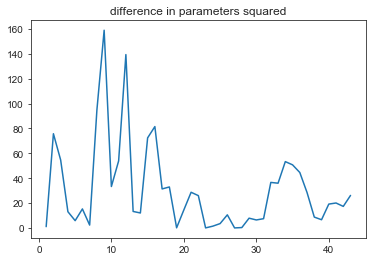

In [40]:
parameters = np.loadtxt('example-params-2.txt')
difference_sqrd = (parameters-final_par_np)**2
plt.figure
plt.plot(range(1,44),difference_sqrd)
plt.title('difference in parameters squared')

## Single mismatches

(array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
 <a list of 8 Text yticklabel objects>)

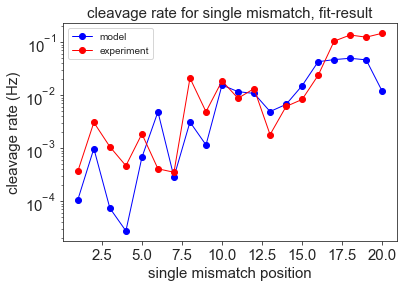

In [53]:
data_exp = pd.read_csv(path_data + filename_data)
k_exp_pd = pltData.plot_single_mut_data(data_exp, 'cleavage_rate', 'r', Canonical=True, data_name='cleavage rate (Hz)', Plot=False, 
                                                    logplot=False, SaveFigures=False)
k_exp = k_exp_pd.values[:,1]

_, k_fake, _ = cr.create_fake_data()
k_fake = k_fake[1:21]

k = np.zeros(20)
for i in range(1,guide+1):
    mismatch = [i]
    k[i-1] = clv.calc_clv_rate_fast(final_par_np,model_ID,mismatch,guide)
    
plt.figure
plt.semilogy(range(1,21),k_fake, marker='o', linewidth=1, color='blue')
plt.semilogy(range(1,21),k_exp, marker='o', linewidth=1, color='red')
plt.xlabel('single mismatch position', fontsize=15)
plt.ylabel('cleavage rate (Hz)', fontsize=15)
plt.title('cleavage rate for single mismatch, fit-result', fontsize=15)
plt.legend(['model','experiment'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

## Double mismatches

Text(0.5,1,'double mismatches, top=model bottom=experiment')

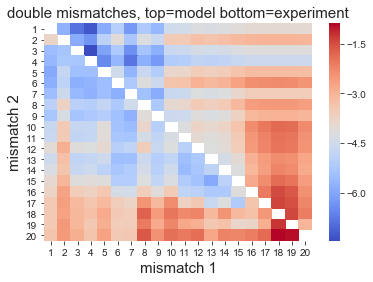

In [52]:
data_exp = pd.read_csv(path_data + filename_data)
_, k_matrix_experiment = pltData.plot_double_mut_data(data_exp, 'cleavage_rate', 'r', Canonical=True, Ng=20, data_name='cleavage rate (Hz)', Plot=False, logplot=True,
                        SaveFigures=False, figure_name='./Figure.pdf')
k_matrix_experiment.fillna(0, inplace=True)

k_matrix = np.zeros([20,20])
k_matrix_fake = np.zeros([20,20])

for i in range(1,20):
    for j in range(i+1,21):
        mismatch_positions = [i,j]
        k_matrix[i-1,j-1] = np.log10(clv.calc_clv_rate_fast(parameters,model_ID,mismatch_positions,guide))
        
for i in range(1,20):
    for j in range(i+1,21):
        mismatch_positions = [i,j]
        k_matrix_fake[j-1,i-1] = np.log10(clv.calc_clv_rate_fast(parameters,model_ID,mismatch_positions,guide))
        
k_df = pd.DataFrame(k_matrix, index=range(1, 21), columns=range(1, 21))
k_df_fake = pd.DataFrame(k_matrix_fake, index=range(1, 21), columns=range(1, 21))
combined_df = k_df + k_matrix_experiment
combined_df_fake = k_df + k_df_fake

for i in range(1,21):
    combined_df[i].loc[i]=np.nan
    combined_df_fake[i].loc[i]=np.nan

sns.heatmap(combined_df, cmap='coolwarm', cbar=True)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)
plt.title('double mismatches, top=model bottom=experiment', fontsize=15)


## Chi squared evolution

(array([10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 <a list of 7 Text yticklabel objects>)

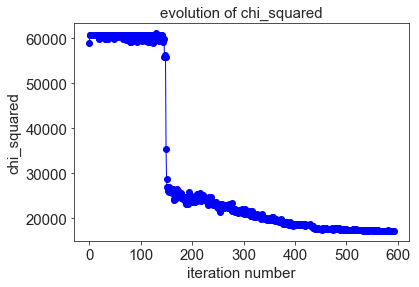

In [43]:
plt.plot(chi, marker='o', linewidth=1, color='blue')
plt.xlabel('iteration number', fontsize=15)
plt.ylabel('chi_squared', fontsize=15)
plt.title('evolution of chi_squared', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)